# Convolutional  Neural Network - Tensorflow TUTORIAL

In [2]:
#pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=e41d3dc60bb67332bfc655854a0fdf0afc4b7ffc5b2658c260bf16dacd8772ea
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
# packages

import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl

%matplotlib inline

### Load Dataset

In [4]:
def load_happy_dataset():
    train_dataset = h5py.File('datasets/05 - happy_house/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/05 - happy_house/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

def load_signs_dataset():
    train_dataset = h5py.File('datasets/04 - signs/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/04 - signs/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

# HAPPY HOUSE

###  Load the Data and Split the Data into Train/Test Sets

In [5]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


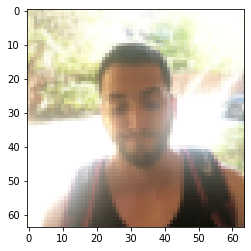

In [6]:
index = 124
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

### Tensorflow Model

In [7]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tf.keras.layers.ZeroPadding2D(padding = 3, input_shape=(64,64,3)),
            
            ## Conv2D with 32 7x7 filters and stride of 1
            tf.keras.layers.Conv2D(filters=32,kernel_size=(7,7),strides=1),
            
            ## BatchNormalization for axis 3
            tf.keras.layers.BatchNormalization(axis=3),
            
            ## ReLU
            tf.keras.layers.ReLU(),

                        
            ## Max Pooling 2D with default parameters
            tf.keras.layers.MaxPool2D(),

            ## Flatten layer
            tf.keras.layers.Flatten(),
                    
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tf.keras.layers.Dense(1, activation ="sigmoid")
            
        ])
    
    return model

### Optimizer and Loss

In [14]:
happy_model = happyModel()
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

### Summary

In [15]:
happy_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_1 (ZeroPaddi  (None, 70, 70, 3)        0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 re_lu_1 (ReLU)              (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                      

### Train and Evaluate the model

In [20]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 2s 64ms/step - loss: 0.1034 - accuracy: 0.9717
Epoch 2/10
38/38 [==============================] - 2s 64ms/step - loss: 0.0586 - accuracy: 0.9833
Epoch 3/10
38/38 [==============================] - 2s 62ms/step - loss: 0.0826 - accuracy: 0.9733
Epoch 4/10
38/38 [==============================] - 2s 53ms/step - loss: 0.0386 - accuracy: 0.9867
Epoch 5/10
38/38 [==============================] - 2s 66ms/step - loss: 0.0517 - accuracy: 0.9850
Epoch 6/10
38/38 [==============================] - 2s 61ms/step - loss: 0.0592 - accuracy: 0.9817
Epoch 7/10
38/38 [==============================] - 2s 57ms/step - loss: 0.0678 - accuracy: 0.9750
Epoch 8/10
38/38 [==============================] - 2s 58ms/step - loss: 0.0826 - accuracy: 0.9733
Epoch 9/10
38/38 [==============================] - 2s 57ms/step - loss: 0.0472 - accuracy: 0.9867
Epoch 10/10
38/38 [==============================] - 2s 56ms/step - loss: 0.0400 - accuracy: 0.9833


In [21]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 32ms/step - loss: 0.6146 - accuracy: 0.8067


[0.6146048903465271, 0.8066666722297668]

# SIGN

### Load Dataset

In [23]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 4


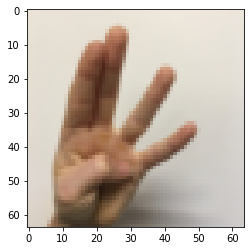

In [24]:
# Example of an image from the dataset
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

### Split data

In [25]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.

print ("X_train shape: " + str(X_train.shape))
print ("X_test shape: " + str(X_test.shape))


X_train shape: (1080, 64, 64, 3)
X_test shape: (120, 64, 64, 3)


In [34]:
print("Y_train:",Y_train_orig)
print("Y_test:",Y_test_orig)

Y_train: [[5 0 2 ... 2 4 5]]
Y_test: [[0 0 0 5 1 0 3 1 5 1 5 1 3 1 1 3 5 4 0 4 5 4 2 5 3 5 4 2 1 2 3 1 0 3 1 1
  0 4 2 3 0 3 0 2 3 1 2 2 0 3 4 1 2 0 4 0 4 0 4 4 5 5 2 4 4 5 0 1 3 5 0 4
  1 2 3 4 3 5 1 5 2 0 1 4 2 4 4 1 4 5 5 0 0 5 5 5 3 3 5 2 2 2 0 2 5 3 0 2
  3 4 1 3 2 4 2 2 1 3 1 3]]


In [35]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [64]:
# Exemple
A = np.random.randint(0,5,(10,))
print(A)
np.eye(6)[A.reshape(-1)]


[4 3 3 4 2 3 1 4 3 3]


array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [65]:
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


### Model

In [66]:

def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tf.keras.layers.Conv2D(8,(4,4),strides=1,padding = 'same')(input_img)
    
    ## RELU
    A1 = tf.keras.layers.ReLU()(Z1)
    
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tf.keras.layers.MaxPool2D(pool_size = (8, 8), strides = 8, padding = 'same')(A1)
    
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tf.keras.layers.Conv2D(16,(2,2),strides=1,padding='same')(P1)
    
    ## RELU
    A2 = tf.keras.layers.ReLU()(Z2)
    
     ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.keras.layers.MaxPool2D(pool_size = (4, 4), strides = 4, padding = 'same')(A2)
    
    
    ## FLATTEN
    F = tf.keras.layers.Flatten()(P2)

    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
    outputs = tf.keras.layers.Dense(6, activation ="softmax")(F)
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [67]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [68]:
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_2 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_3 (ReLU)              (None, 8, 8, 16)          0         
                                                             

### Train the model

In [69]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 2s 58ms/step - loss: 1.7995 - accuracy: 0.1796 - val_loss: 1.7867 - val_accuracy: 0.2083
Epoch 2/100
17/17 [==============================] - 1s 53ms/step - loss: 1.7848 - accuracy: 0.2380 - val_loss: 1.7815 - val_accuracy: 0.1833
Epoch 3/100
17/17 [==============================] - 1s 44ms/step - loss: 1.7799 - accuracy: 0.2500 - val_loss: 1.7766 - val_accuracy: 0.3417
Epoch 4/100
17/17 [==============================] - 1s 49ms/step - loss: 1.7747 - accuracy: 0.3343 - val_loss: 1.7718 - val_accuracy: 0.4083
Epoch 5/100
17/17 [==============================] - 1s 48ms/step - loss: 1.7685 - accuracy: 0.3657 - val_loss: 1.7655 - val_accuracy: 0.3917
Epoch 6/100
17/17 [==============================] - 1s 41ms/step - loss: 1.7603 - accuracy: 0.3815 - val_loss: 1.7574 - val_accuracy: 0.4333
Epoch 7/100
17/17 [==============================] - 1s 38ms/step - loss: 1.7490 - accuracy: 0.3861 - val_loss: 1.7465 - val_accuracy: 0.4417
Epoch 

### History


The history object is an output of the `.fit()` operation, and provides a record of all the loss and metric values in memory. It's stored as a dictionary that you can retrieve at `history.history`: 

In [70]:
history.history

{'loss': [1.7994964122772217,
  1.7848312854766846,
  1.7798711061477661,
  1.7746849060058594,
  1.7684903144836426,
  1.7603189945220947,
  1.7490378618240356,
  1.7354235649108887,
  1.7191721200942993,
  1.699729561805725,
  1.6758116483688354,
  1.649223804473877,
  1.6197588443756104,
  1.5869325399398804,
  1.554226040840149,
  1.5198945999145508,
  1.4851627349853516,
  1.4530099630355835,
  1.4209483861923218,
  1.388169288635254,
  1.356210708618164,
  1.3239604234695435,
  1.2881190776824951,
  1.2505295276641846,
  1.201712965965271,
  1.1522692441940308,
  1.106695294380188,
  1.0641285181045532,
  1.0272111892700195,
  0.9934445023536682,
  0.9649469256401062,
  0.9332095980644226,
  0.9097544550895691,
  0.883169412612915,
  0.8622287511825562,
  0.8417447209358215,
  0.8227930665016174,
  0.8052873015403748,
  0.789071798324585,
  0.7731168866157532,
  0.7598838806152344,
  0.7460649609565735,
  0.733582079410553,
  0.7206938862800598,
  0.708834171295166,
  0.696036756

### Visualization Loss

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

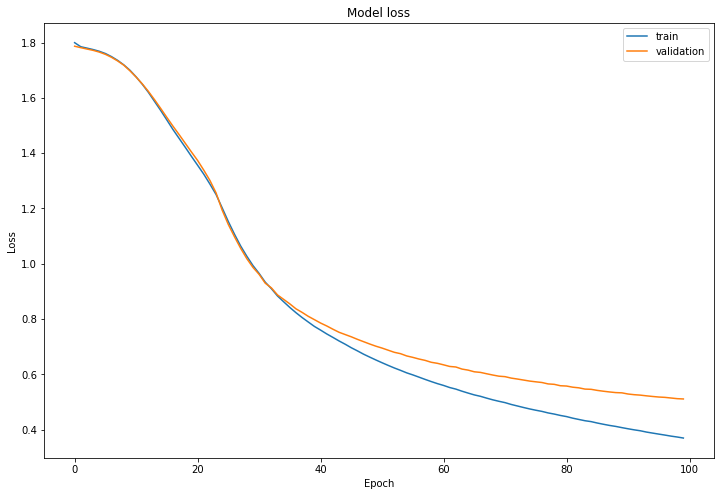

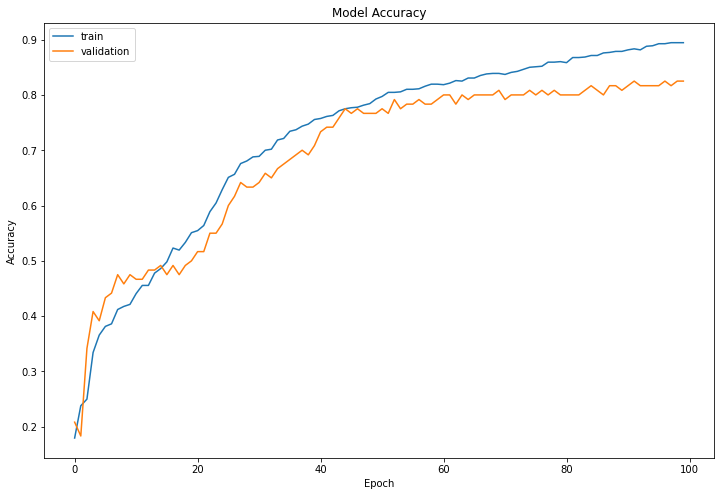

In [71]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')